In [14]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import numpy as np
import torch

from library.datamodules.sen2cloud import Sen2CloudDataModule
from tqdm import tqdm
import matplotlib.pyplot as plt

In [36]:
datamodule = Sen2CloudDataModule(
    data_root = './dataset',
    batch_size = 16,
    train_shuffle = False,
    verbose=True,
)

Input standardization :
[0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0]


# Statistics

In [37]:
datamodule.setup("fit")
datamodule.setup("test")

train_dataset = datamodule.train_dataset
val_dataset = datamodule.val_dataset
test_dataset = datamodule.test_dataset

len(train_dataset), len(val_dataset), len(test_dataset)

(414, 171, 547)

## Counts by locations

In [ ]:
df_train = train_dataset.image_files.sort_values('chip_id')
df_train.head()

In [ ]:
df_train_by_loc = df_train.groupby('location').count()
df_train_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar', ylabel='counts', 
                                                          title='Training sample counts by location')

In [ ]:
df_val = val_dataset.image_files.sort_values('chip_id')
df_val.head()

In [ ]:
df_val_by_loc = df_val.groupby('location').count()
df_val_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar', ylabel='counts', 
                                                          title='Validation sample counts by location')

In [ ]:
df_test = test_dataset.image_files.sort_values('chip_id')
df_test.head()

In [ ]:
df_test_by_loc = df_test.groupby('location').count()
df_test_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar', ylabel='counts', 
                                                          title='Test sample counts by location')

## Pixel statistics

In [38]:
# MEAN / STD placeholders
psum    = torch.tensor([0.0, 0.0, 0.0, 0.0])
psum_sq = torch.tensor([0.0, 0.0, 0.0, 0.0])
pixel_counts = [0,0]

# loop through images
# for inputs in datamodule.train_dataloader():
for inputs in tqdm(datamodule.train_dataloader()):
    
    # check images to get mean and standard
    psum    += inputs['image'].sum(axis        = [0, 2, 3])
    psum_sq += (inputs['image'] ** 2).sum(axis = [0, 2, 3])

    # check masks to get pixel class counts
    labels, counts = torch.unique(inputs['mask'], return_counts=True)
    for idx, label in enumerate(labels):
        pixel_counts[label] = pixel_counts[label] + counts[idx]

# pixel count
count = len(train_dataset.image_files) * 512 * 512

# mean and std
total_mean = psum / count
total_var  = (psum_sq / count) - (total_mean ** 2)
total_std  = torch.sqrt(total_var)

  0%|          | 0/25 [00:00<?, ?it/s]

100%|██████████| 25/25 [00:29<00:00,  1.18s/it]


mean: [2615.418701171875, 2622.208984375, 2533.412841796875, 3428.4697265625]
std: [3048.64697265625, 2810.951904296875, 2712.26318359375, 2447.972900390625]
----------------------------
no: 0.6181789636611938
cloud: 0.38182103633880615



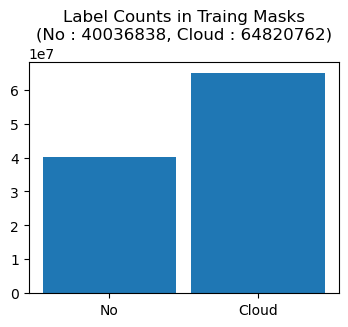

In [41]:
# output
print(f"mean: {str(total_mean.tolist())}\n"                    \
      f"std: {str(total_std.tolist())}\n"                      \
      f"----------------------------\n"                     \
      f"no: {1-pixel_counts[0]/np.sum(pixel_counts)}\n"     \
      f"cloud: {1-pixel_counts[1]/np.sum(pixel_counts)}\n"  )

plt.figure(figsize=(4,3))
_ = plt.bar(['No','Cloud'], pixel_counts, width=0.9)
_ = plt.title(f"Label Counts in Traing Masks\n" \
              f"(No : {pixel_counts[0]}, Cloud : {pixel_counts[1]})")

# Visualization

zapr tensor([[2020.,  109.]]) tensor([-16.0052,  28.7050])
rcct tensor([[2020.,  234.]]) tensor([-15.9570,  28.5552])
whuj tensor([[2020.,  251.]]) tensor([-0.4123,  9.5769])


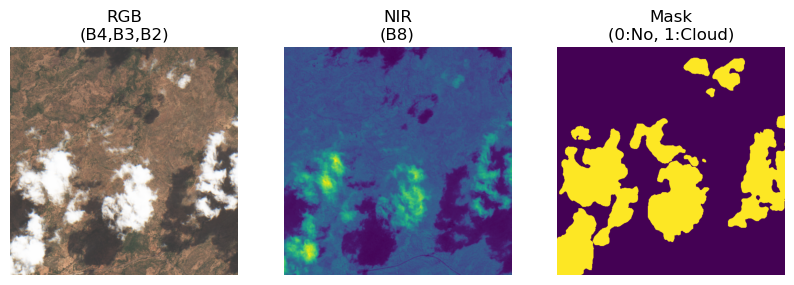

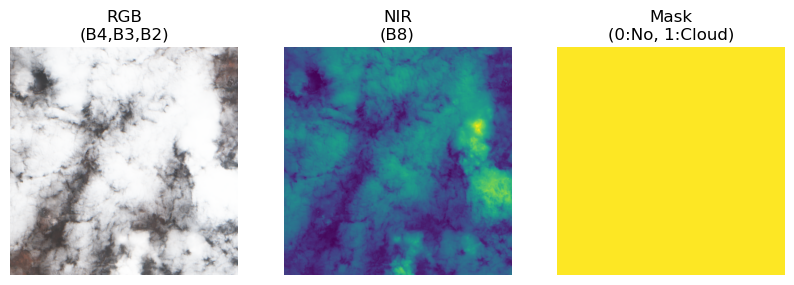

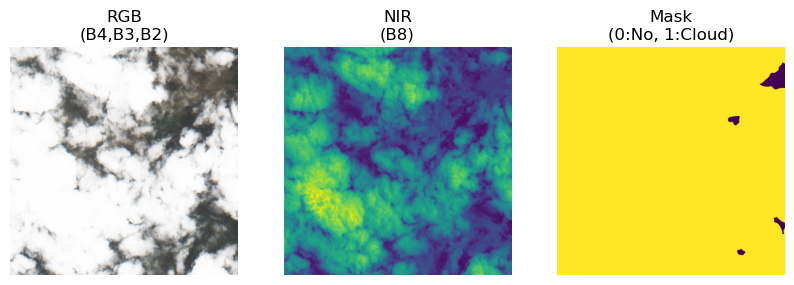

In [57]:
idxs = np.random.randint(0, len(train_dataset)-1, 3)

for i, idx in enumerate(idxs):
    print(train_dataset.image_files.loc[idx,'chip_id'], 
          train_dataset._get_date(idx), train_dataset._get_coords(idx))
    train_dataset.plot(train_dataset[idx])

madv tensor([[2020.,   89.]]) tensor([-15.3848,  17.4243])
msce tensor([[2020.,  120.]]) tensor([-10.5410,  25.5756])
gquu tensor([[2020.,  223.]]) tensor([ 3.5789, 25.8246])


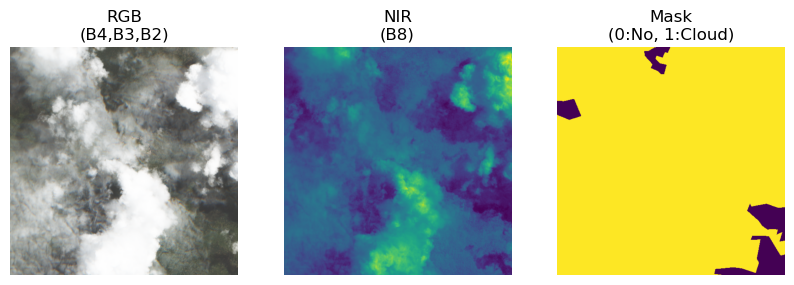

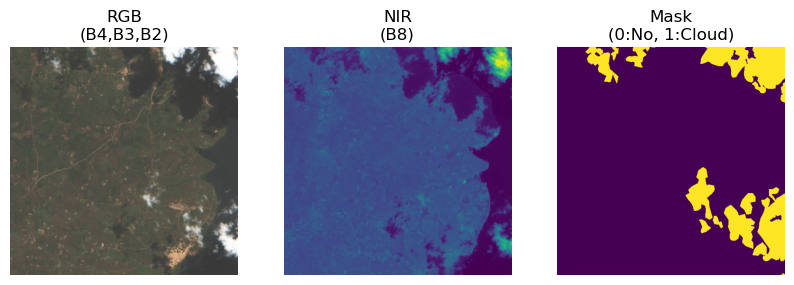

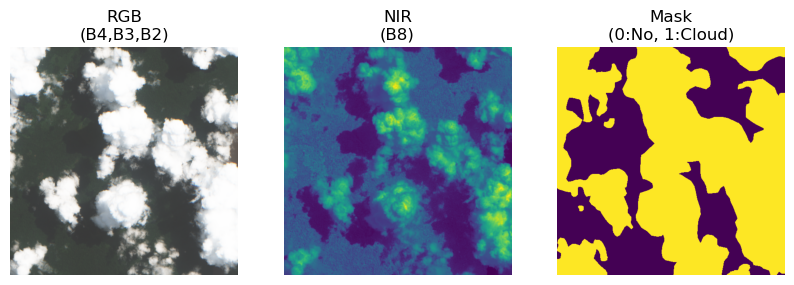

In [58]:
idxs = np.random.randint(0, len(val_dataset)-1, 3)

for i, idx in enumerate(idxs):
    print(val_dataset.image_files.loc[idx,'chip_id'], 
          val_dataset._get_date(idx), val_dataset._get_coords(idx))
    val_dataset.plot(val_dataset[idx])

gbse
pzrx
gnlq


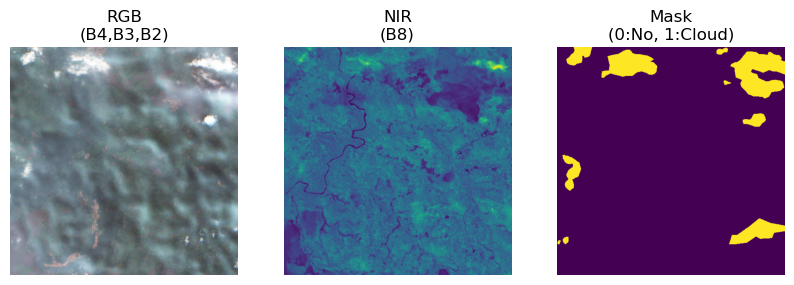

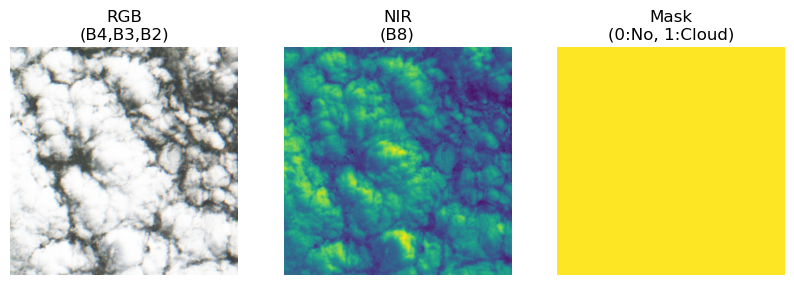

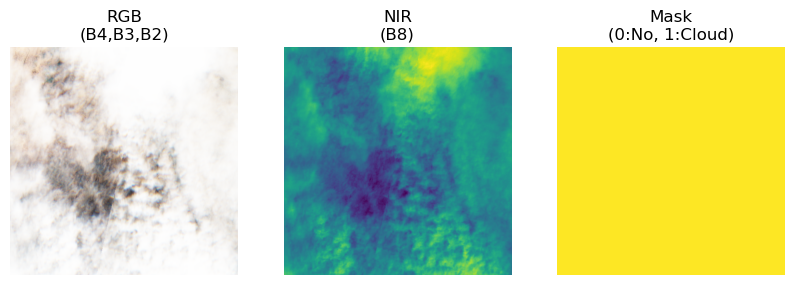

In [59]:
idxs = np.random.randint(0, len(test_dataset)-1, 3)

for i, idx in enumerate(idxs):
    print(test_dataset.image_files.loc[idx,'chip_id'])
    test_dataset.plot(test_dataset[idx])